In [2]:
from func_list import speed
import xarray as xr


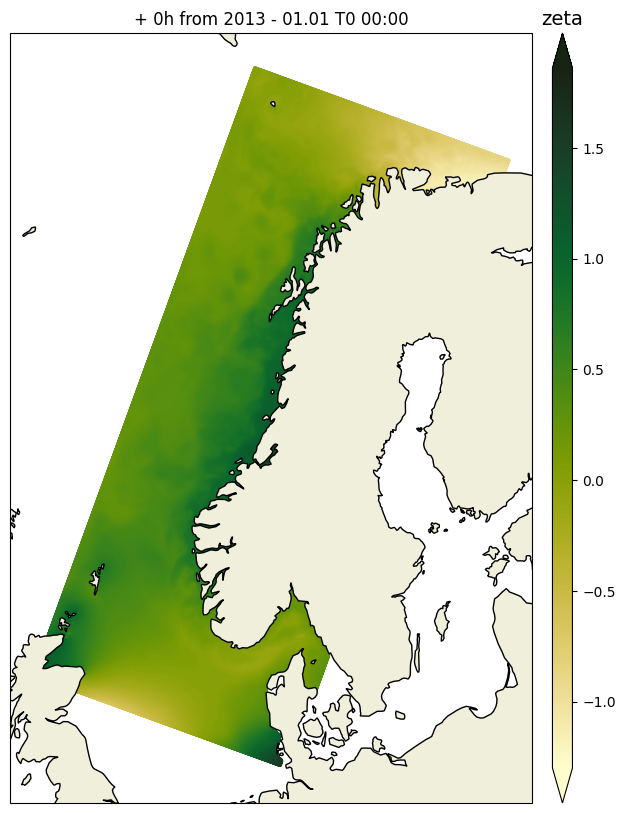

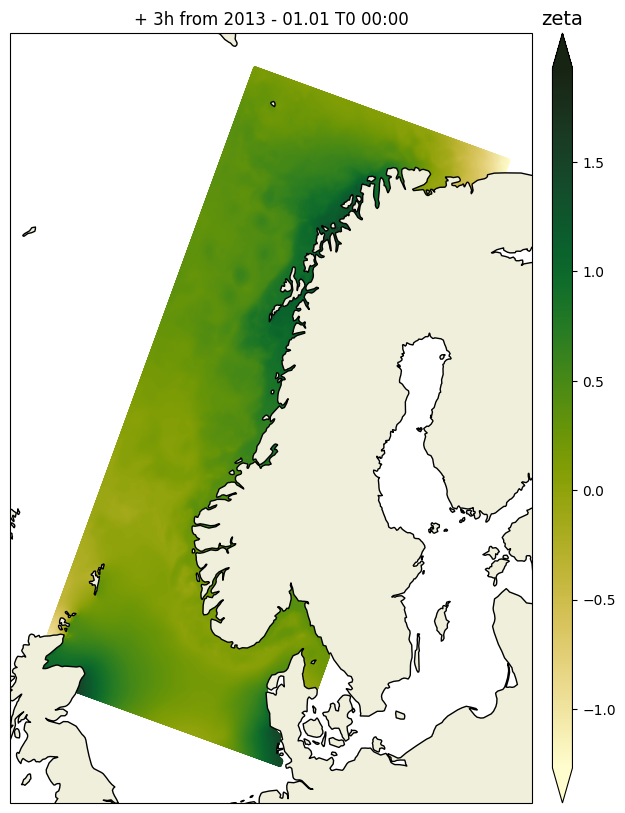

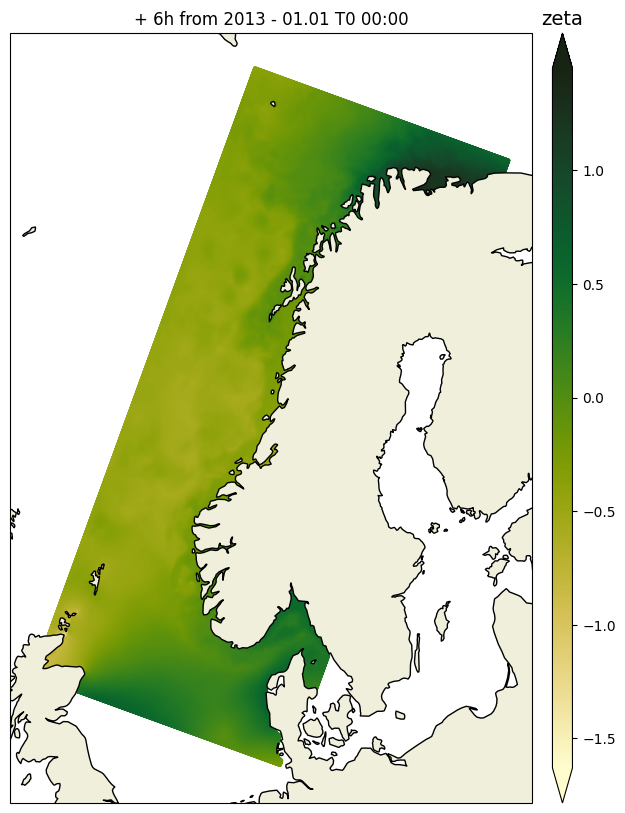

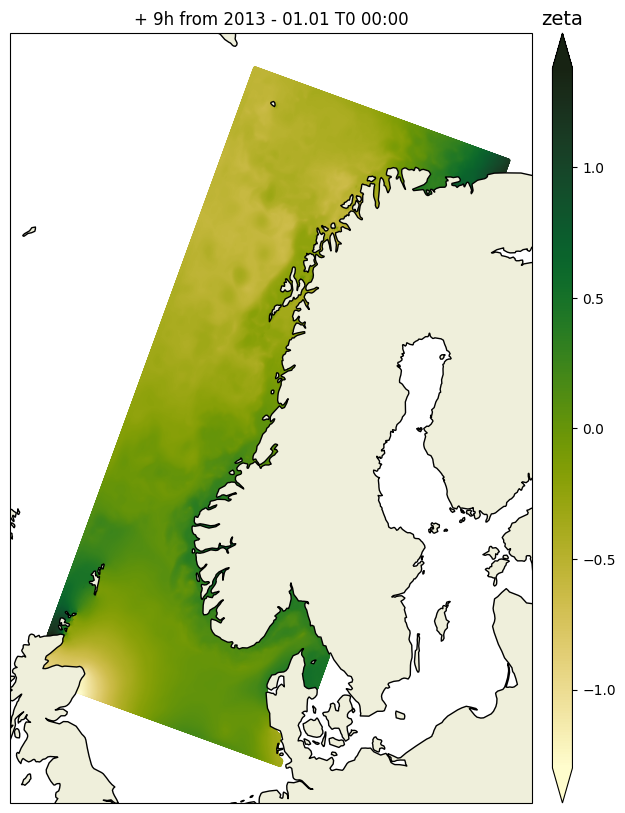

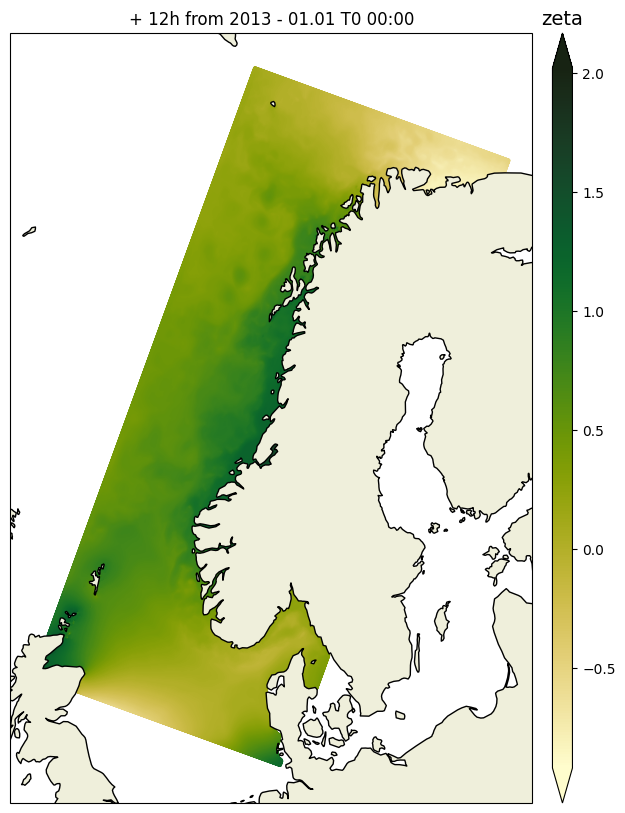

In [3]:
for time_indx in [0,3,6,9,12]:
    speed(file_name = "/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2013_surface.zarr", variable = "zeta", year = "2013", datetime = "01.01 T0 00:00", time_indx = time_indx, cbar_title = "zeta")

In [4]:
from anemoi.datasets import open_dataset

In [46]:
file = f'/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/2013/norkyst800-20130101.nc'
ds_fasit = xr.open_dataset(file).isel(s_rho = -1, time = 0 )
ds_fasit.Y

<xarray.DataArray 'Y' (Y: 1148)> Size: 9kB
array([0.000e+00, 8.000e+02, 1.600e+03, ..., 9.160e+05, 9.168e+05, 9.176e+05],
      shape=(1148,))
Coordinates:
    time     datetime64[ns] 8B 2013-01-01
    s_rho    float64 8B -0.004904
  * Y        (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.16e+05 9.168e+05 9.176e+05
Attributes:
    axis:           Y
    standard_name:  projection_y_coordinate
    units:          meter

In [47]:
#zeta for different points, first I try X = 360 and Y = 760
ds_fasit.zeta.values

array([[  nan,   nan,   nan, ..., -0.87, -0.87, -0.87],
       [  nan,   nan,   nan, ..., -0.87, -0.87, -0.87],
       [  nan,   nan,   nan, ..., -0.87, -0.87, -0.87],
       ...,
       [  nan,   nan,   nan, ...,  0.02,  0.02,  0.02],
       [  nan,   nan,   nan, ...,  0.02,  0.02,  0.02],
       [  nan,   nan,   nan, ...,  0.02,  0.02,  0.02]],
      shape=(1148, 2747), dtype=float32)

In [ ]:
file_zarr = f"/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2013_surface.zarr"
#ds_zarr = open_dataset(file_zarr, select = "zeta", area = (58.8949542, 1.8680563, 58.8949542, 1.8680563), start = '2013-01-01T00:00:00', end = '2013-01-01T01:00:00')
ds_zarr = open_dataset(file_zarr, select = "zeta")

In [29]:
import numpy as np

In [35]:
np.argwhere(ds_zarr.longitudes-1.8680563<1e-16).shape

(352837, 1)

In [38]:
ds_zarr[ds_zarr.name_to_index['zeta'],:,:,100]

array([[nan]], dtype=float32)

In [21]:
ds_zarr.metadata()

{'version': '0.5.23',
 'arguments': {'args': ['/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2013_surface.zarr'],
  'kwargs': {'select': 'zeta',
   'area': [58.8949542, 1.8680563, 58.8949542, 1.8680563],
   'start': '2013-01-01T00:00:00',
   'end': '2013-01-01T01:00:00'}},
 'specific': {'action': 'cropping',
  'variables': ['zeta'],
  'shape': [2, 1, 1, 0],
  'frequency': '1h',
  'start_date': '2013-01-01T00:00:00',
  'end_date': '2013-01-01T01:00:00',
  'forward': {'action': 'select',
   'variables': ['zeta'],
   'shape': [2, 1, 1, 3153556],
   'frequency': '1h',
   'start_date': '2013-01-01T00:00:00',
   'end_date': '2013-01-01T01:00:00',
   'forward': {'action': 'subset',
    'variables': ['Uwind_eastward',
     'Vwind_northward',
     'h',
     'salinity_0',
     'sea_mask',
     'temperature_0',
     'u_eastward_0',
     'ubar_eastward',
     'v_northward_0',
     'vbar_northward',
     'zeta'],
    'shape': [2, 11, 1, 3153556],
    'frequency': '1h',
    'start

In [9]:
ds_zarr.statistics

{'mean': array([-0.12241766]),
 'stdev': array([0.46485961]),
 'maximum': array([2.73000002]),
 'minimum': array([-3.30999994])}

In [10]:
ds_fasit.lon.values

array(1.8680563)

In [90]:
ds_fasit.lat.values
ds_fasit

<xarray.Dataset> Size: 1GB
Dimensions:           (Y: 1148, X: 2747, s_w: 41)
Coordinates:
    time              datetime64[ns] 8B 2013-01-01
    s_rho             float64 8B -0.004904
  * X                 (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y                 (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.168e+05 9.176e+05
  * s_w               (s_w) float64 328B -1.0 -0.96 -0.9208 ... -0.01 0.0
    lon               (Y, X) float64 25MB ...
    lat               (Y, X) float64 25MB 54.29 54.3 54.31 ... 75.71 75.72 75.73
Data variables: (12/18)
    Uwind_eastward    (Y, X) float32 13MB nan nan nan nan ... -6.13 -6.28 -6.41
    Vwind_northward   (Y, X) float32 13MB ...
    zeta              (Y, X) float32 13MB nan nan nan nan ... 0.02 0.02 0.02
    ubar_eastward     (Y, X) float32 13MB ...
    vbar_northward    (Y, X) float32 13MB ...
    u_eastward        (Y, X) float32 13MB ...
    ...                ...
    hc                float64 8B ...
    Cs_r              float64 8B ...
    Cs_w              (s_w) float64 328B ...
    h                 (Y, X) float32 13MB ...
    projection_stere  int32 4B ...
    depth             int32 4B ...
Attributes: (12/33)
    id:                      fcecccc5-0967-42ff-82ed-6dd439eaad1b
    naming_authority:        no.met
    operational_status:      scientific
    iso_topic_category:      oceans
    activity_type:           Numerical Simulation
    keywords_vocabulary:     GCMDSK:GCMD Science Keywords:https://gcmd.earthd...
    ...                      ...
    project:                 Norkyst_v3
    license:                 https://spdx.org/licenses/CC-BY-4.0 (CC-BY-4.0)
    title:                   Norkyst-800m - ROMS, Norkyst-800m ocean hindcast...
    summary:                 Norkyst-800m (Norwegian Coast 800m horizontal re...
    title_no:                Hindcast prognoser fra havmodellen Norkyst-800m,...
    summary_no:              NorKyst-800m (Norske kystområder med 800m horiso...

In [72]:
import matplotlib.pyplot as plt
conv_to_np = xr.DataArray.to_numpy(ds_fasit.zeta)
conv_to_np.flatten()

array([ nan,  nan,  nan, ..., 0.02, 0.02, 0.02],
      shape=(3153556,), dtype=float32)

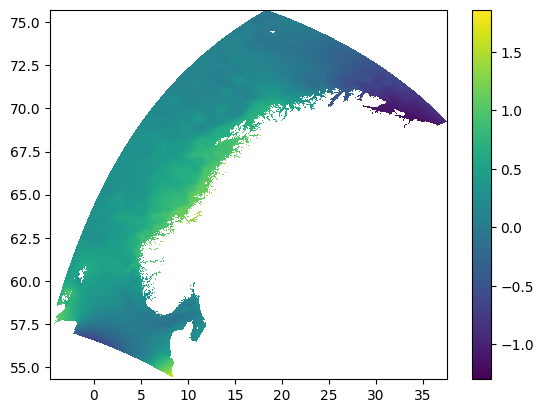

In [ ]:
plt.pcolormesh(ds_fasit.lon, ds_fasit.lat, ds_fasit.zeta[:,:])
#plt.pcolormesh(ds_fasit - ds_zarr[ds_zarr.name_to_index['zeta'],:,:,:])
plt.colorbar()

In [ ]:
#plt.pcolormesh(ds_zarr.longitudes, ds_zarr.latitudes, ds_zarr[0,:,:,:])
#plt.plot(ds_zarr[0:5,0,0])

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fcb7a8e0250>>
Traceback (most recent call last):
  File "/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [ ]:
ds_fasit

In [1]:
import cartopy.crs as ccrs
fig, ax = plt.subplots(1,2, subplot_kw={'projection': ccrs.Mercator()})

ax[0].plot(ds_fasit[:, :], x='longitude', y='latitude', transform=ccrs.PlateCarree())
ax[1].plot(ds_zarr[0, :, :], x='longitude', y='latitude', transform=ccrs.PlateCarree())

NameError: name 'plt' is not defined